In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [102]:
# Load the data
file_path = "/content/btc_1d_data_2018_to_2025.csv"
df = pd.read_csv(file_path)

df.head()

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,2018-01-01,13715.65,13818.55,12750.00,13380.00,8609.915844,2018-01-01 23:59:59.999,1.147997e+08,105595,3961.938946,5.280975e+07,0
1,2018-01-02,13382.16,15473.49,12890.02,14675.11,20078.092111,2018-01-02 23:59:59.999,2.797171e+08,177728,11346.326739,1.580801e+08,0
2,2018-01-03,14690.00,15307.56,14150.00,14919.51,15905.667639,2018-01-03 23:59:59.999,2.361169e+08,162787,8994.953566,1.335873e+08,0
3,2018-01-04,14919.51,15280.00,13918.04,15059.54,21329.649574,2018-01-04 23:59:59.999,3.127816e+08,170310,12680.812951,1.861168e+08,0
4,2018-01-05,15059.56,17176.24,14600.00,16960.39,23251.491125,2018-01-05 23:59:59.999,3.693220e+08,192969,13346.622293,2.118299e+08,0


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2737 entries, 0 to 2736
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Open time                     2737 non-null   object 
 1   Open                          2737 non-null   float64
 2   High                          2737 non-null   float64
 3   Low                           2737 non-null   float64
 4   Close                         2737 non-null   float64
 5   Volume                        2737 non-null   float64
 6   Close time                    2737 non-null   object 
 7   Quote asset volume            2737 non-null   float64
 8   Number of trades              2737 non-null   int64  
 9   Taker buy base asset volume   2737 non-null   float64
 10  Taker buy quote asset volume  2737 non-null   float64
 11  Ignore                        2737 non-null   int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 256.7+ KB


In [104]:
df = df.drop(['Close time'], axis=1)

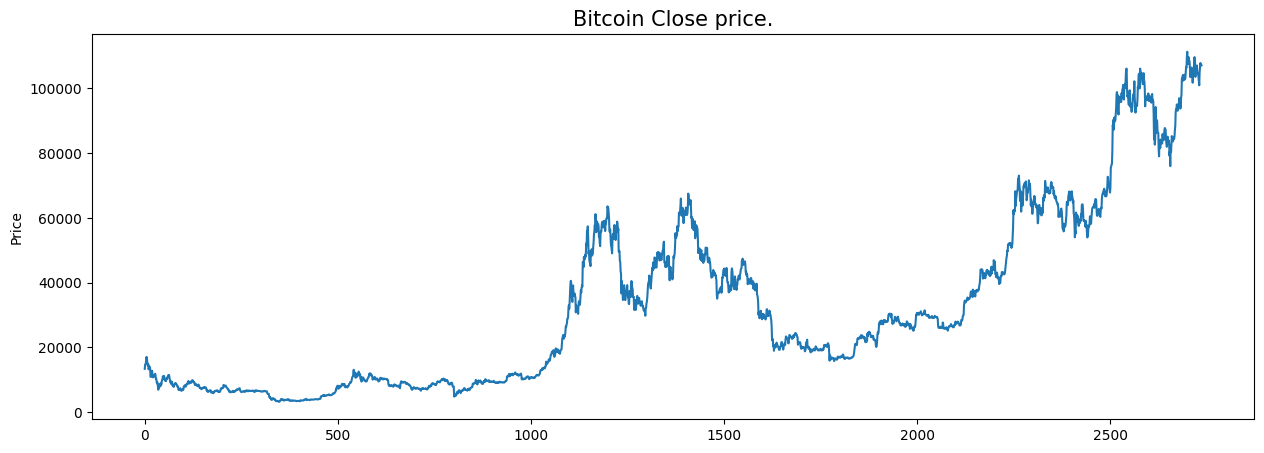

In [105]:
plt.figure(figsize=(15, 5))
plt.plot(df['Close'])
plt.title('Bitcoin Close price.', fontsize=15)
plt.ylabel('Price')
plt.show()

In [106]:
df.isnull().sum()

,0
Open time,0
Open,0
High,0
Low,0
Close,0
Volume,0
Quote asset volume,0
Number of trades,0
Taker buy base asset volume,0
Taker buy quote asset volume,0


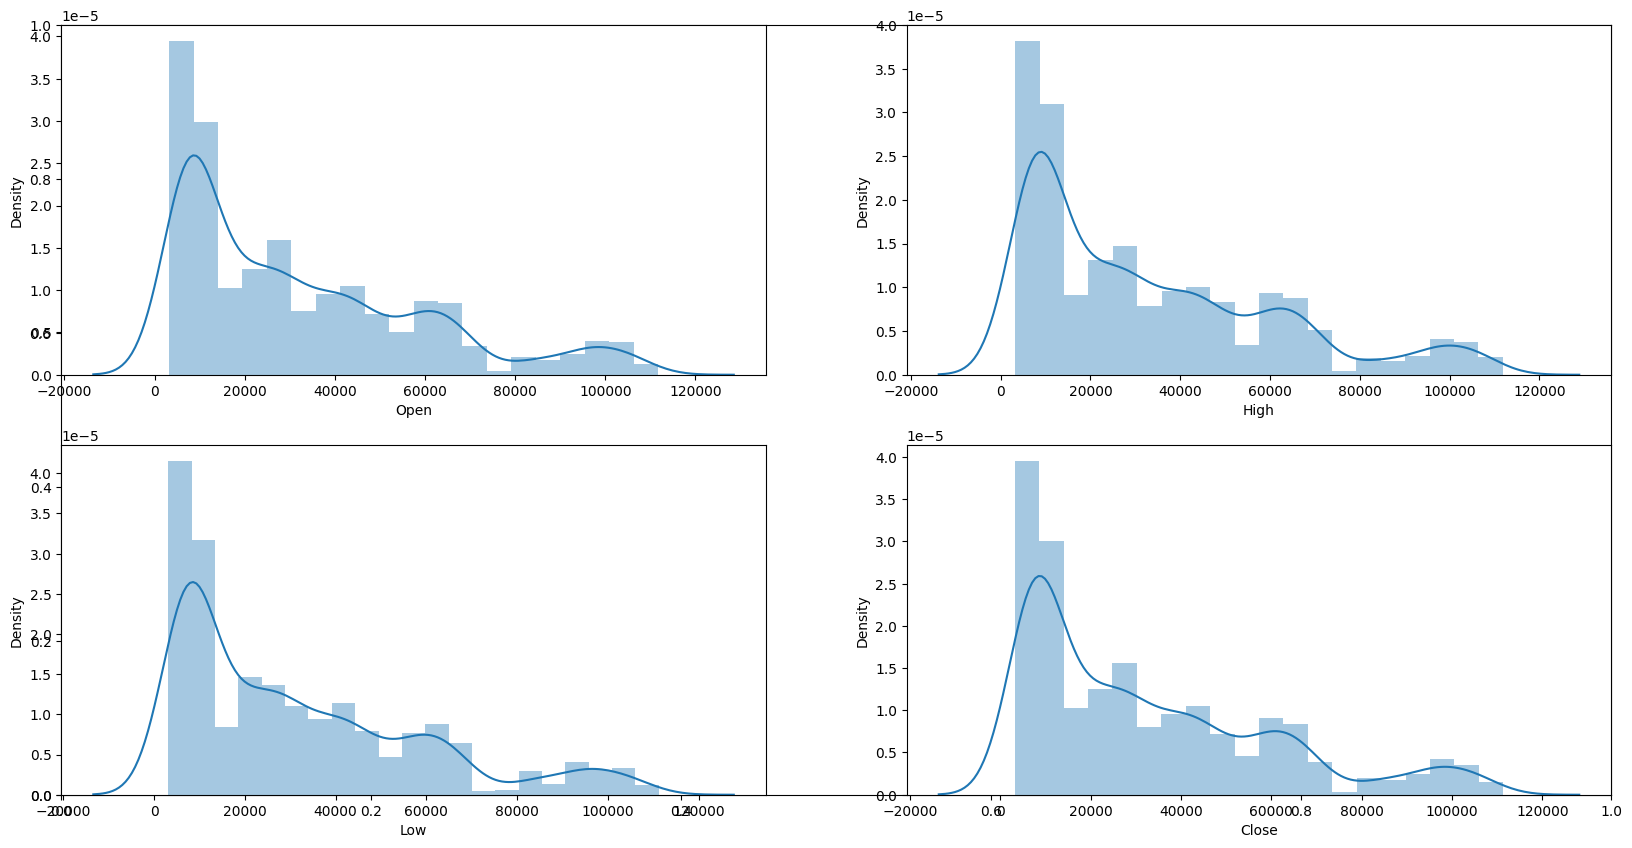

In [107]:
features = ['Open', 'High', 'Low', 'Close']

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sn.distplot(df[col])
plt.show()

In [108]:
splitted = df['Open time'].str.split('-', expand=True)

df['year'] = splitted[0].astype('int')
df['month'] = splitted[1].astype('int')
df['day'] = splitted[2].astype('int')

# Convert the 'Date' column to datetime objects
df['Open time'] = pd.to_datetime(df['Open time'])

df.head()

,Open time,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore,year,month,day
0,2018-01-01,13715.65,13818.55,12750.00,13380.00,8609.915844,1.147997e+08,105595,3961.938946,5.280975e+07,0,2018,1,1
1,2018-01-02,13382.16,15473.49,12890.02,14675.11,20078.092111,2.797171e+08,177728,11346.326739,1.580801e+08,0,2018,1,2
2,2018-01-03,14690.00,15307.56,14150.00,14919.51,15905.667639,2.361169e+08,162787,8994.953566,1.335873e+08,0,2018,1,3
3,2018-01-04,14919.51,15280.00,13918.04,15059.54,21329.649574,3.127816e+08,170310,12680.812951,1.861168e+08,0,2018,1,4
4,2018-01-05,15059.56,17176.24,14600.00,16960.39,23251.491125,3.693220e+08,192969,13346.622293,2.118299e+08,0,2018,1,5


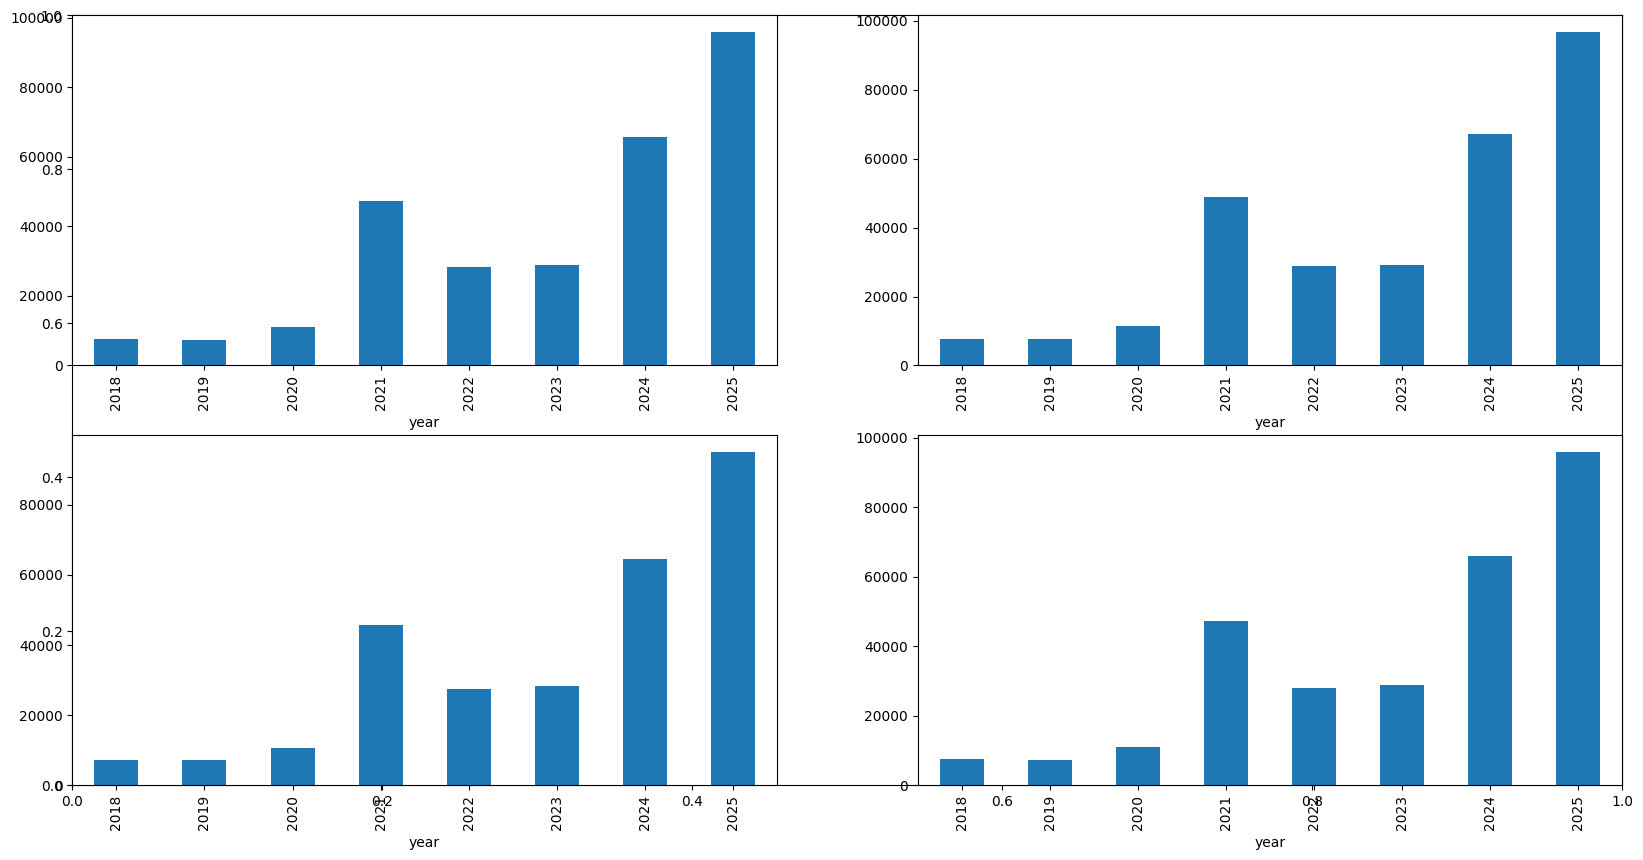

In [109]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [110]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Open time,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore,year,month,day,is_quarter_end
0,2018-01-01,13715.65,13818.55,12750.00,13380.00,8609.915844,1.147997e+08,105595,3961.938946,5.280975e+07,0,2018,1,1,0
1,2018-01-02,13382.16,15473.49,12890.02,14675.11,20078.092111,2.797171e+08,177728,11346.326739,1.580801e+08,0,2018,1,2,0
2,2018-01-03,14690.00,15307.56,14150.00,14919.51,15905.667639,2.361169e+08,162787,8994.953566,1.335873e+08,0,2018,1,3,0
3,2018-01-04,14919.51,15280.00,13918.04,15059.54,21329.649574,3.127816e+08,170310,12680.812951,1.861168e+08,0,2018,1,4,0
4,2018-01-05,15059.56,17176.24,14600.00,16960.39,23251.491125,3.693220e+08,192969,13346.622293,2.118299e+08,0,2018,1,5,0


In [111]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

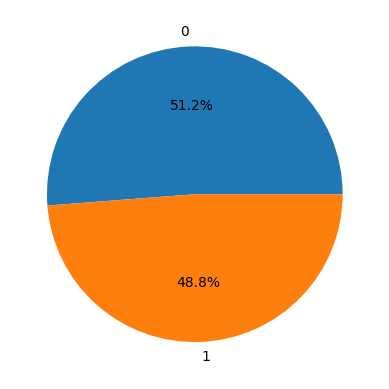

In [112]:
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

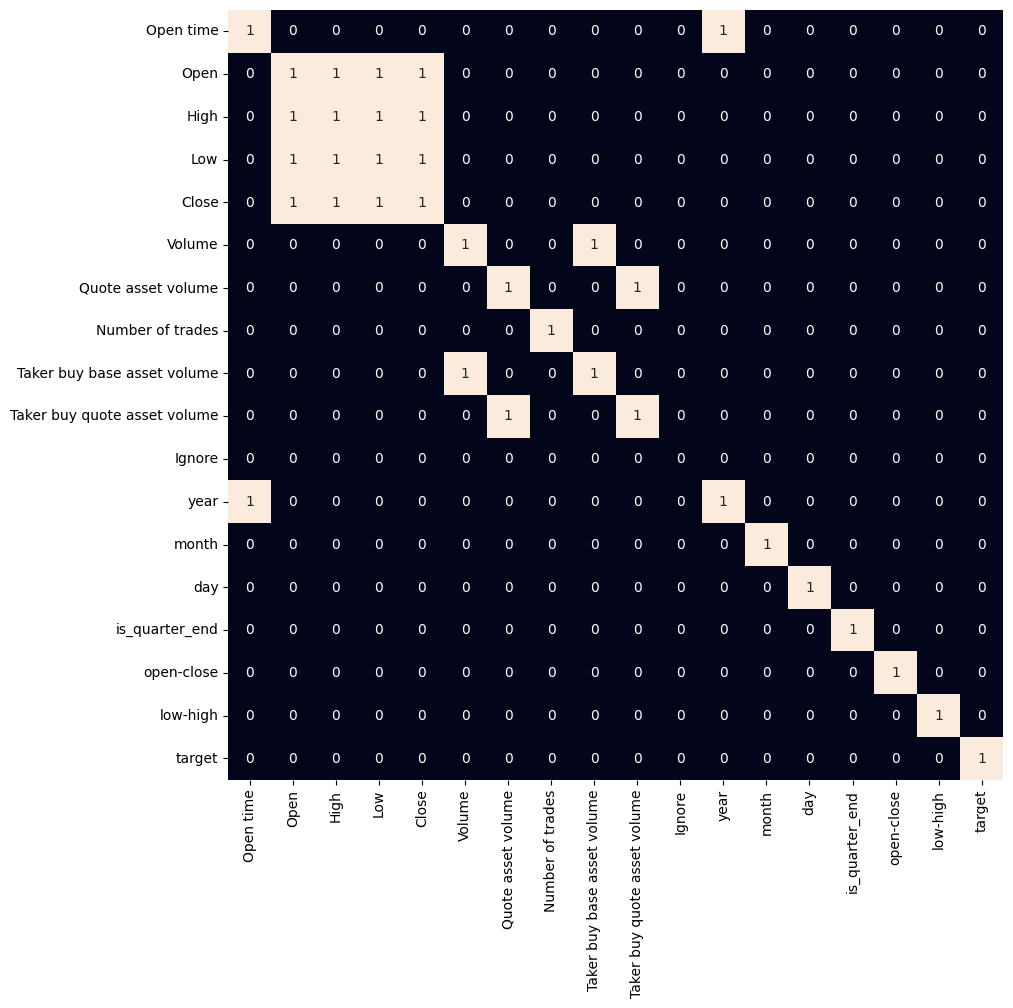

In [113]:
plt.figure(figsize=(10, 10))

sn.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [114]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

# Scaling the features
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Split the data into training and validation (test) sets
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.3, random_state=42)



In [115]:
# model = XGBClassifier().fit(X_train, Y_train)
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier(use_label_encoder=False, eval_metric='logloss', max_depth=4, n_estimators=300)]

for i in range(3):
  models[i].fit(X_train, Y_train)
  prediction = models[i].predict(X_test)
  print(metrics.classification_report(Y_test, prediction))
  print('Accuracy on Training data : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Accuracy on Test data : ', metrics.roc_auc_score(Y_test, models[i].predict_proba(X_test)[:,1]))

              precision    recall  f1-score   support

           0       0.52      0.28      0.36       390
           1       0.54      0.77      0.64       432

    accuracy                           0.54       822
   macro avg       0.53      0.52      0.50       822
weighted avg       0.53      0.54      0.51       822

Accuracy on Training data :  0.5420356733758795
Accuracy on Test data :  0.5534662867996202
              precision    recall  f1-score   support

           0       0.49      0.16      0.24       390
           1       0.53      0.85      0.65       432

    accuracy                           0.52       822
   macro avg       0.51      0.50      0.44       822
weighted avg       0.51      0.52      0.46       822

Accuracy on Training data :  0.4752730049637266
Accuracy on Test data :  0.4939577397910731
              precision    recall  f1-score   support

           0       0.48      0.50      0.49       390
           1       0.53      0.52      0.53       432

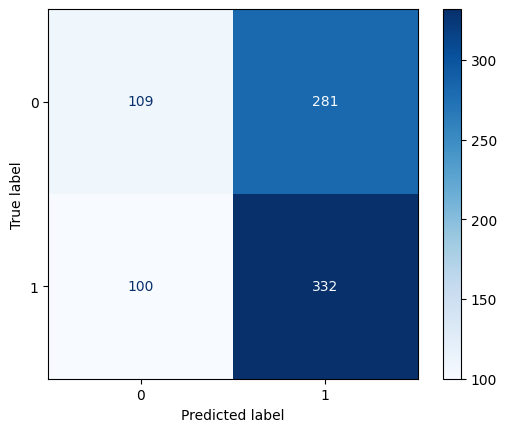

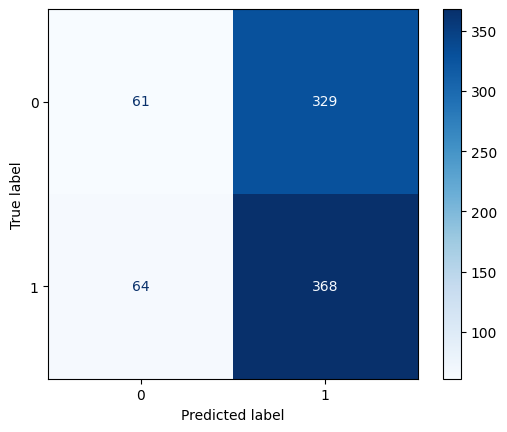

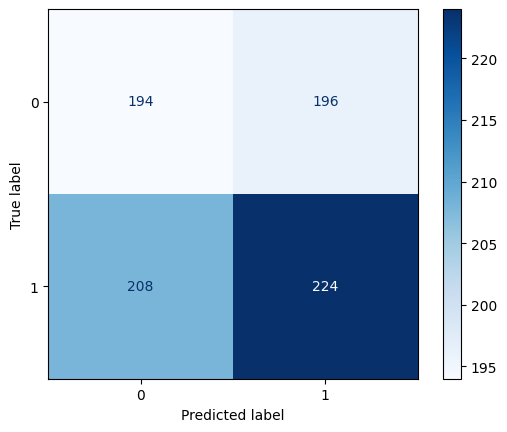

In [116]:
from sklearn.metrics import ConfusionMatrixDisplay

for i in range(3):
  ConfusionMatrixDisplay.from_estimator(models[i], X_test, Y_test, cmap='Blues')
  plt.show()